# Exploratory Data Science 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../dataset/bike_share.csv')
df.sample(5)

,Unnamed: 0,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
6223,6223,2012-02-15 13:00:00,Spring,No,Yes,Clear,16.40,20.455,43,19.0012,11,159,170
9247,9247,2012-09-08 16:00:00,Fall,No,No,Light rain/snow,22.96,26.515,88,12.9980,19,95,114
2427,2427,2011-06-09 01:00:00,Summer,No,Yes,Clear,30.34,35.605,79,7.0015,3,13,16
5835,5835,2012-01-18 08:00:00,Spring,No,Yes,Clear,12.30,13.635,52,27.9993,15,474,489
3709,3709,2011-09-05 11:00:00,Fall,Yes,No,Cloudy,28.70,33.335,74,11.0014,101,207,308


In [3]:
df.head()

,Unnamed: 0,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,0,2011-01-01 00:00:00,Spring,No,No,Clear,9.84,14.395,81,0.0,3,13,16
1,1,2011-01-01 01:00:00,Spring,No,No,Clear,9.02,13.635,80,0.0,8,32,40
2,2,2011-01-01 02:00:00,Spring,No,No,Clear,9.02,13.635,80,0.0,5,27,32
3,3,2011-01-01 03:00:00,Spring,No,No,Clear,9.84,14.395,75,0.0,3,10,13
4,4,2011-01-01 04:00:00,Spring,No,No,Clear,9.84,14.395,75,0.0,0,1,1


In [4]:
df.shape

(10886, 13)

In [5]:
df.tail()

,Unnamed: 0,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,10881,2012-12-19 19:00:00,Winter,No,Yes,Clear,15.58,19.695,50,26.0027,7,329,336
10882,10882,2012-12-19 20:00:00,Winter,No,Yes,Clear,14.76,17.425,57,15.0013,10,231,241
10883,10883,2012-12-19 21:00:00,Winter,No,Yes,Clear,13.94,15.910,61,15.0013,4,164,168
10884,10884,2012-12-19 22:00:00,Winter,No,Yes,Clear,13.94,17.425,61,6.0032,12,117,129
10885,10885,2012-12-19 23:00:00,Winter,No,Yes,Clear,13.12,16.665,66,8.9981,4,84,88


# Garbage columns 

In [6]:
# Dropping Garbage Columns)

to_drop = ['Unnamed: 0','casual','registered']

df = df.drop(to_drop , axis = 1)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,Spring,No,No,Clear,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,Spring,No,No,Clear,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,Spring,No,No,Clear,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,Spring,No,No,Clear,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,Spring,No,No,Clear,9.84,14.395,75,0.0,1


# Correlation Analysis

Dropping columns that are highly correlated ( that may be positivily or negatively )

In [7]:
df.corr()

# checking out correlation between the columns. highly correlated data are dropped

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


In [8]:
df.drop(['atemp'] ,axis = 1 ,inplace = True)

In [9]:
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,count
0,2011-01-01 00:00:00,Spring,No,No,Clear,9.84,81,0.0,16
1,2011-01-01 01:00:00,Spring,No,No,Clear,9.02,80,0.0,40
2,2011-01-01 02:00:00,Spring,No,No,Clear,9.02,80,0.0,32
3,2011-01-01 03:00:00,Spring,No,No,Clear,9.84,75,0.0,13
4,2011-01-01 04:00:00,Spring,No,No,Clear,9.84,75,0.0,1


# Nan value

checking Nan value and keeping sum 
if higher the nan value in column then dropping that column is recommendable

In [10]:
# looking for Nan value in dataset

df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
humidity      0
windspeed     0
count         0
dtype: int64

# Creating Barplot

Categorical value VS Numerical value

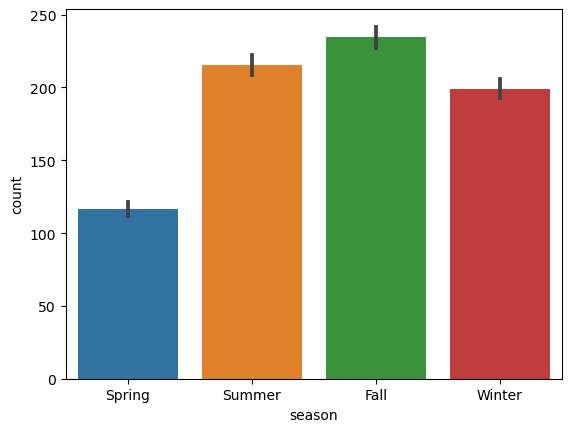

In [11]:
sns.barplot(x ='season' , y = 'count',data = df )
plt.show()

# error bar refers to standard deviation of 1 

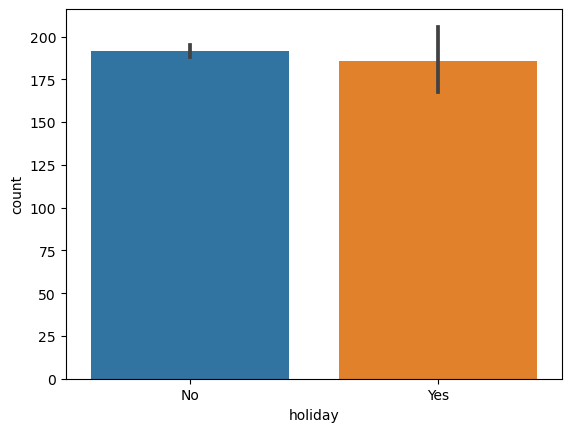

In [12]:
sns.barplot(x ='holiday' , y = 'count',data = df )
plt.show()

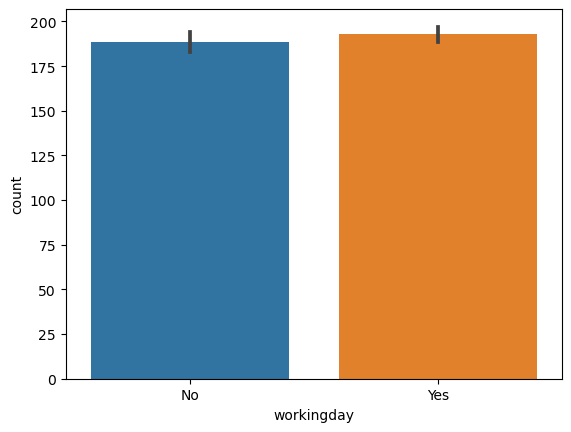

In [13]:
sns.barplot(x ='workingday' , y = 'count',data = df )
plt.show()

In [14]:
df.drop(['workingday'], axis = 1, inplace = True)

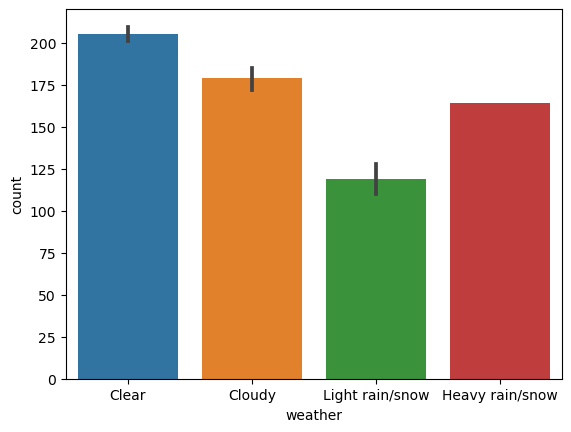

In [15]:
sns.barplot(x = 'weather', y= 'count', data = df)
plt.show()

# in weather, Heavy rain /show there is no standard deviation as there is only one sample data in the dataset

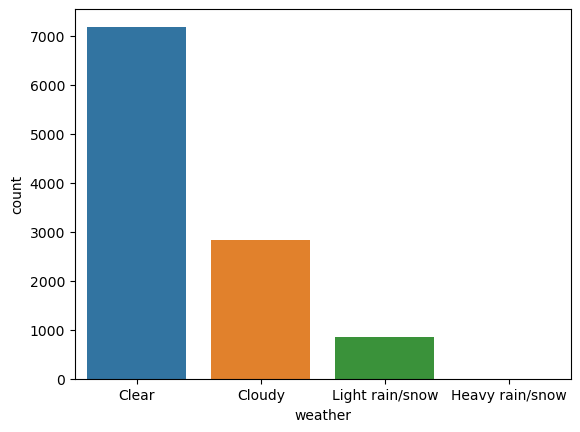

In [16]:
sns.countplot(x = 'weather',data = df)
plt.show()

In [17]:
df.head()

,datetime,season,holiday,weather,temp,humidity,windspeed,count
0,2011-01-01 00:00:00,Spring,No,Clear,9.84,81,0.0,16
1,2011-01-01 01:00:00,Spring,No,Clear,9.02,80,0.0,40
2,2011-01-01 02:00:00,Spring,No,Clear,9.02,80,0.0,32
3,2011-01-01 03:00:00,Spring,No,Clear,9.84,75,0.0,13
4,2011-01-01 04:00:00,Spring,No,Clear,9.84,75,0.0,1


# Creating PointPlot 

Numerical VS Numerical values

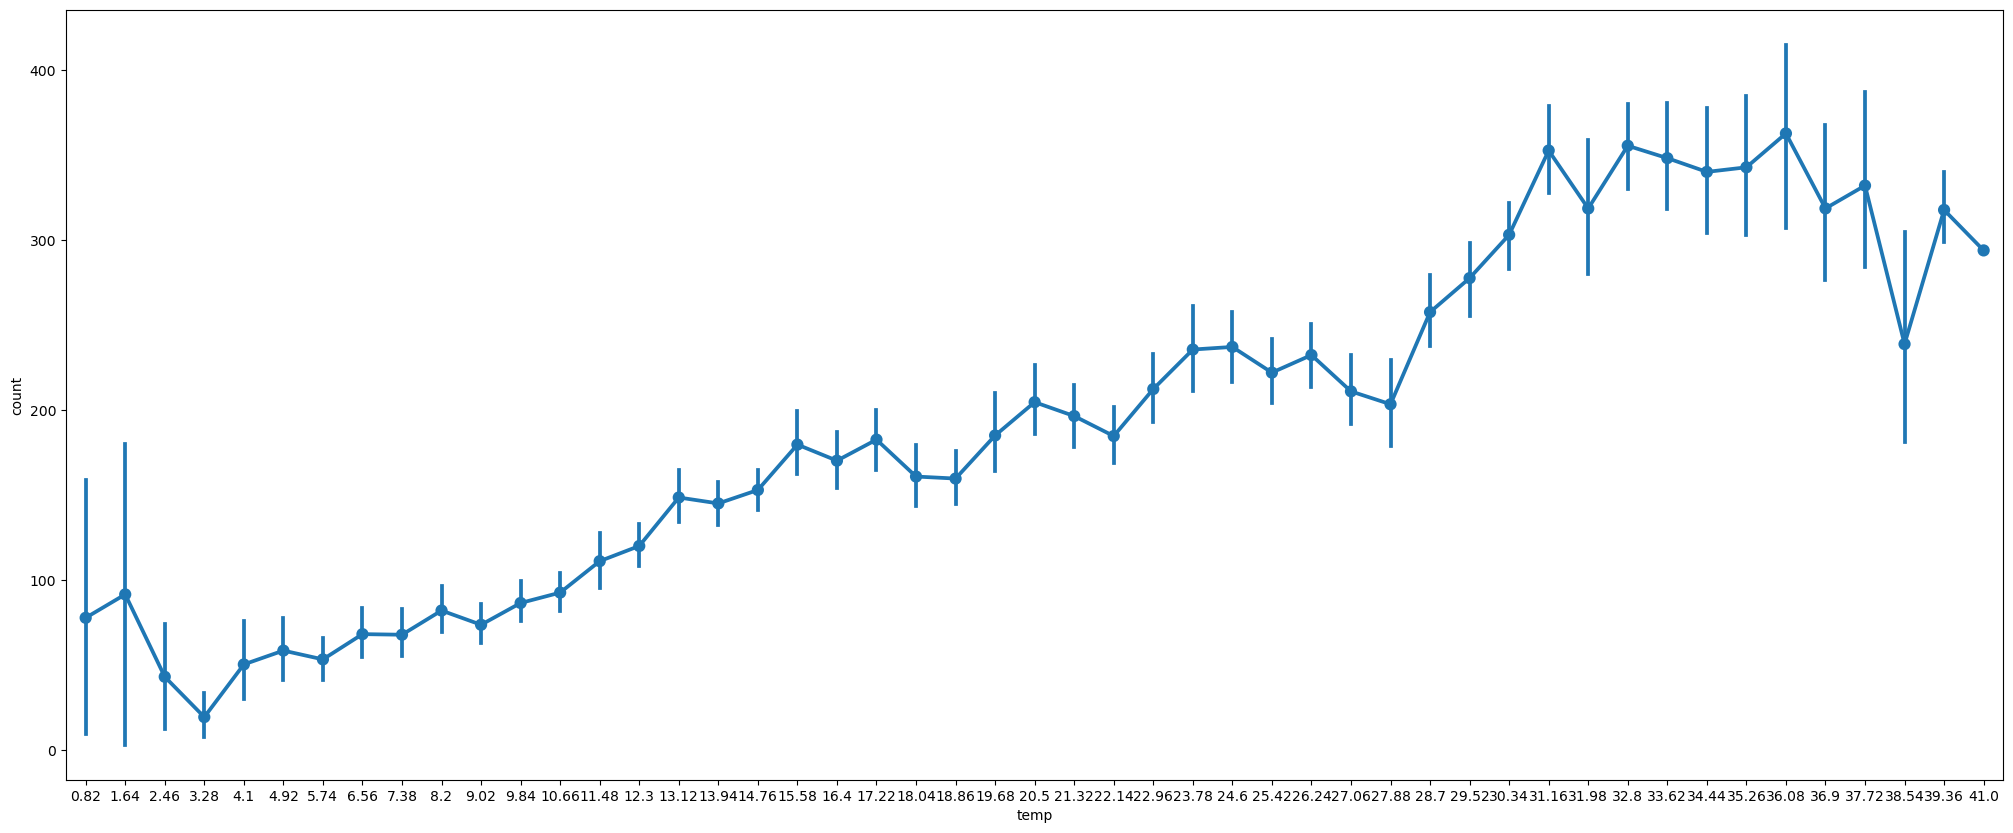

In [18]:
plt.figure(figsize = (25, 10))

sns.pointplot(x='temp', y = 'count' , data = df)
plt.show()

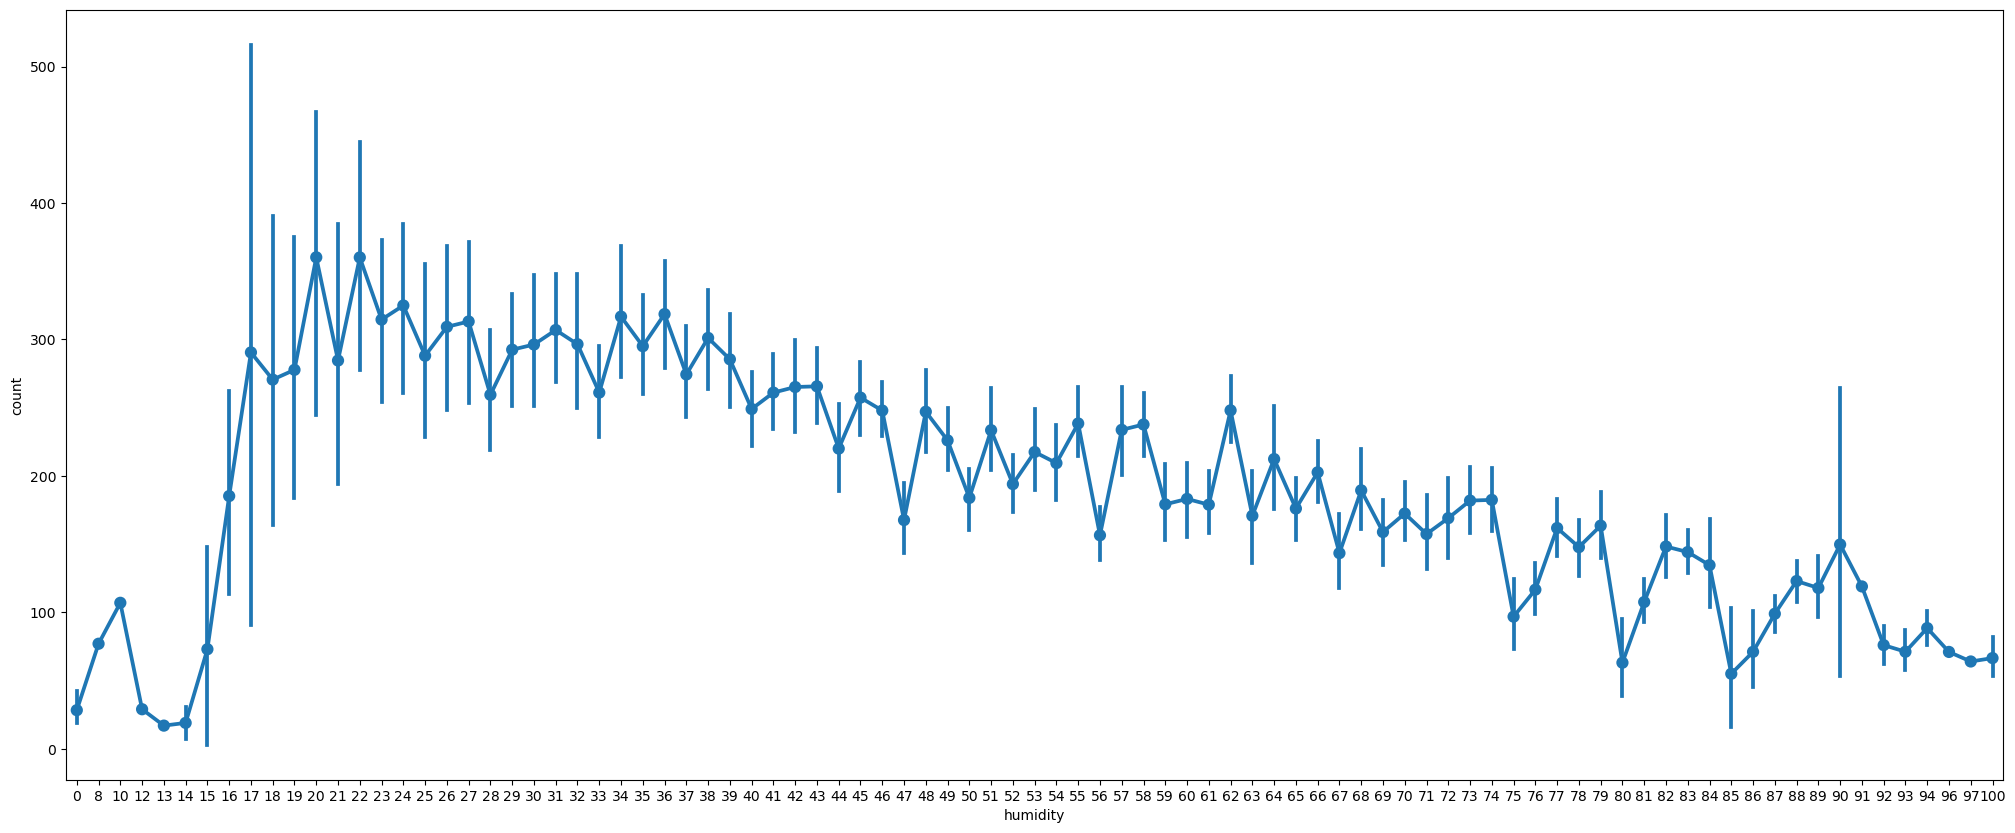

In [19]:
plt.figure(figsize = (25, 10))
sns.pointplot(x='humidity', y = 'count' , data = df)
plt.show()

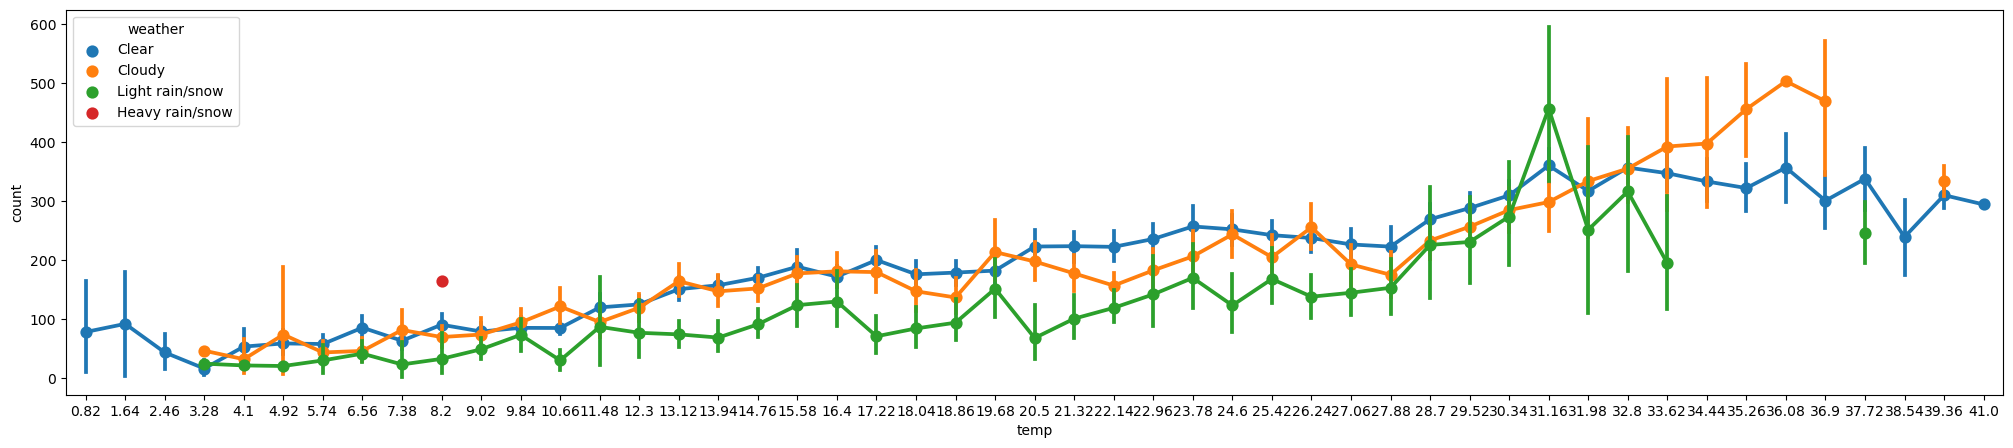

In [20]:
plt.figure(figsize = (25, 5))

sns.pointplot(x='temp', y = 'count' , data = df, hue = 'weather')
plt.show()

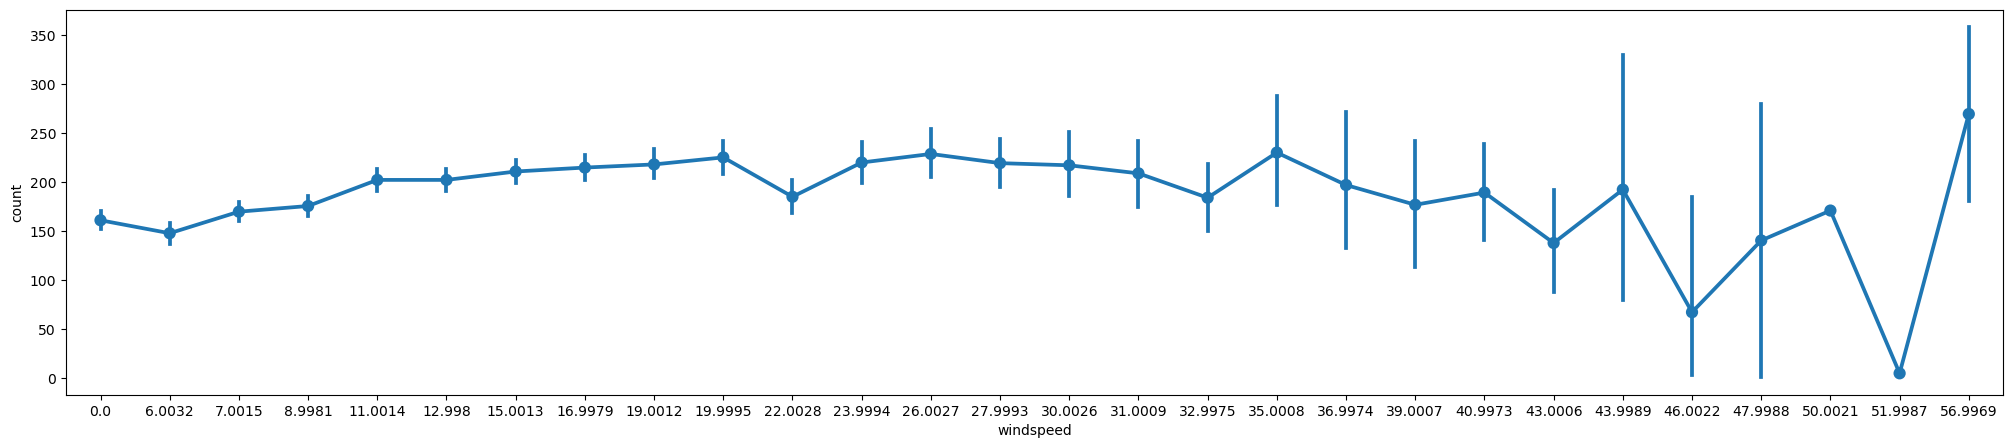

In [21]:
plt.figure(figsize = (25, 5))
sns.pointplot(x='windspeed', y = 'count' , data = df)
plt.show()

In [22]:
df.head()

,datetime,season,holiday,weather,temp,humidity,windspeed,count
0,2011-01-01 00:00:00,Spring,No,Clear,9.84,81,0.0,16
1,2011-01-01 01:00:00,Spring,No,Clear,9.02,80,0.0,40
2,2011-01-01 02:00:00,Spring,No,Clear,9.02,80,0.0,32
3,2011-01-01 03:00:00,Spring,No,Clear,9.84,75,0.0,13
4,2011-01-01 04:00:00,Spring,No,Clear,9.84,75,0.0,1


# Handling DateTime

In [23]:
# handling datetime 

df['datetime'] = pd.DatetimeIndex(df['datetime'])

In [24]:
hour = []
for timestamp in df['datetime']:
    hour = np.append(hour,timestamp.hour)

In [25]:
df.drop(['datetime'],axis = 1 ,inplace = True)

In [26]:
df['hour']= hour

In [27]:
df.head()

,season,holiday,weather,temp,humidity,windspeed,count,hour
0,Spring,No,Clear,9.84,81,0.0,16,0.0
1,Spring,No,Clear,9.02,80,0.0,40,1.0
2,Spring,No,Clear,9.02,80,0.0,32,2.0
3,Spring,No,Clear,9.84,75,0.0,13,3.0
4,Spring,No,Clear,9.84,75,0.0,1,4.0


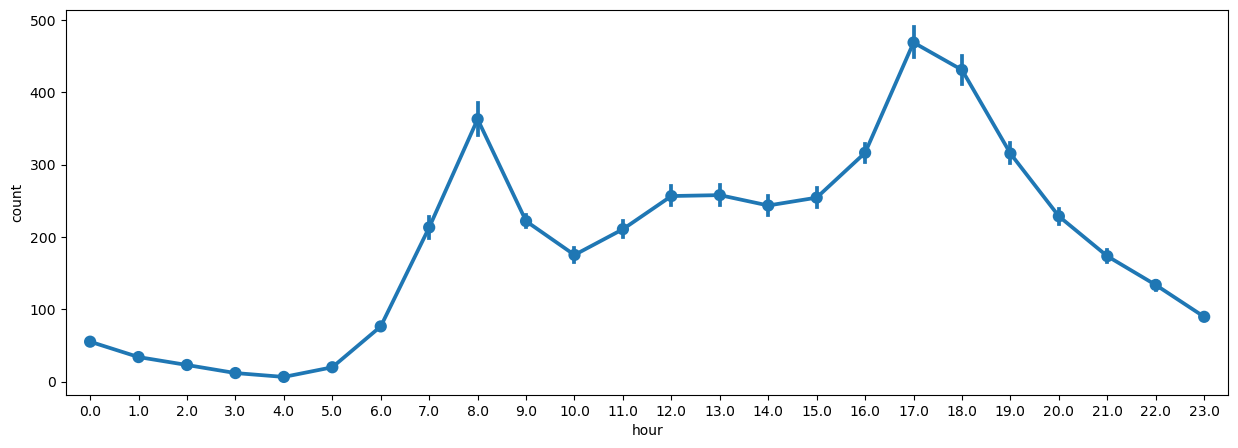

In [28]:
plt.figure(figsize = (15,5))
sns.pointplot(x = 'hour', y = 'count', data = df)
plt.show()

In [29]:
df.head()

,season,holiday,weather,temp,humidity,windspeed,count,hour
0,Spring,No,Clear,9.84,81,0.0,16,0.0
1,Spring,No,Clear,9.02,80,0.0,40,1.0
2,Spring,No,Clear,9.02,80,0.0,32,2.0
3,Spring,No,Clear,9.84,75,0.0,13,3.0
4,Spring,No,Clear,9.84,75,0.0,1,4.0


In [30]:
mapper = {'Yes': 1 , 'No': 0}
df['holiday']=df['holiday'].map(mapper)

In [31]:
df.sample(5)

,season,holiday,weather,temp,humidity,windspeed,count,hour
5699,Spring,0,Clear,18.04,72,8.9981,188,15.0
6584,Spring,0,Clear,20.50,29,19.9995,487,15.0
9374,Fall,0,Clear,23.78,73,7.0015,170,23.0
9240,Fall,0,Clear,28.70,74,26.0027,348,9.0
3301,Fall,0,Clear,33.62,63,0.0000,269,11.0


# LabelEncoder through Scikit-learn

In [32]:
from sklearn.preprocessing import LabelEncoder

# label encoding for season and weather

In [33]:
season_encoder = LabelEncoder()
weather_encoder = LabelEncoder()

In [34]:
df['season'] = season_encoder.fit_transform(df['season'])
df['weather'] = weather_encoder.fit_transform(df['weather'])

In [35]:
df.sample(5)

,season,holiday,weather,temp,humidity,windspeed,count,hour
7802,2,0,1,22.96,56,12.9980,227,11.0
7838,2,0,0,21.32,77,0.0000,123,23.0
5856,1,0,0,4.92,55,16.9979,19,5.0
8711,0,0,0,31.16,66,22.0028,108,8.0
7099,2,0,0,14.76,71,7.0015,14,4.0


# Standardscalling through scikit-learn

# Linear Regression

In [40]:
X = df.drop('count',axis =1)
y = df['count']

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score

In [42]:
lin_reg = LinearRegression(n_jobs = -1)

In [44]:
lin_reg.fit(X , y)

LinearRegression(n_jobs=-1)

In [45]:
lin_reg.intercept_

3.332817941905546

In [46]:
lin_reg.coef_

array([25.89059786, -4.85110521, -7.29628357,  9.26339037, -1.95628544,
        0.06224946,  7.4493102 ])